# Graph Algorithms

## Representing graphs

Here are some ways of specifying a graph:

1. From a list of edges
2. From its adjacency matrix
3. From its incidence matrix
4. Using a Boolean function

Let us use these four methods to construct the cycle graph with ten vertices.

In [1]:
# From a list of edges
G1 = Graph([(i, (i+1)%10) for i in range(10)])

# From adjacency matrix
A = Matrix(ZZ, 10, 10)
for i in range(1, 9):
    A[i, i+1] = 1
    A[i, i-1] = 1
A[9, 0] = 1
A[9, 8] = 1
A[0, 9] = 1
A[0, 1] = 1
G2 = Graph(A, format='adjacency_matrix')

# From incidence matrix
A = Matrix(ZZ, 10, 10)
for i in range(9):
    A[i, i] = 1
    A[i, i+1] = 1
A[9, 0] = 1
A[9, 9] = 1
G3 = Graph(A, format='incidence_matrix')

# From Boolean function
G4 = Graph([range(10), lambda i,j: abs(j-i) == 1 or (i==9 and j==0) or (i==0 and j==9)])

If the entries of the adjacency matrix are specified, then amount of space needed to define a graph with $V$ vertices is $V^2$. This kind of specification is called a *dense graph*.

If a list of $V$ vertices and $E$ edges is provided, then the amount of space needed to define the graph is roughly $V + E$. This kind of specification is called a *sparse graph*.

In general, if there are very few edges, sparse graph representations are used; otherwise dense graph representations are used.

## Graph traversal: depth-first versus breadth-first

A graph traversal with root node `r` is an enumeration of nodes of the graph such that 
1. The first node in the enumration is `r`.
2. each node in the enumeration has an edge to one of the earlier nodes in the enumeration.

For a graph traversal, a starting node (the *root node*) is specified. The algorithm should visit each node of the graph exactly once if the graph is connected.

There are two standard ways of doing this - *depth-first search* (DFS) and *breadth-first search* (BFS).
In both methods, you start with the root node. At every stage of the algorithm you keep track of two things:
1. ``V`` - nodes already visisted
2. ``N`` - nodes which can be visited next.

The difference between DFS and BFS is that in DFS, ``N`` is treated as a *queue* (first-in-first-out data structure), whereas in NFS ``N`` is treated as a *stack* (first-in-last-out data strcuture).

## Queues and stacks in python

A python list serves well as a stack:

In [5]:
L = [6, 1, 2, 9]
L.pop() # 9 is popped from the right of L
L.pop() # 2 is popped from the right of L
L.append(4) # 4 is appended to the right of L
print L

[6, 1, 4]


But adding and removing elements to the *beginning* of a python is list is not very efficient, because the index of all the terms in the list has to be shifted by one. For this purpose python provides ``deque`` which has fast pops and appends on both ends:

In [7]:
from collections import deque
L = deque([6, 1, 2, 9])
L.popleft() # 6 is popped
L.popleft() # 1 is popped
L.append(4) # 4 is appended to the right of L
print L

6
deque([2, 9, 4])


Note that a ``deque`` also has an ``appendleft`` method. See https://docs.python.org/2/library/collections.html#collections.deque for more information 

## Implementing graph traversal

In [38]:
from collections import deque
def traverse(G, root, algorithm):
    r"""
    Return a traversal of ``G`` starting with root node ``r`` using DFS or BFS.
    
    INPUT:
    
    ``G`` - a graph or directed graph
    ``r`` - a node of ``G``
    ``algorithm`` - 'DFS' or 'BFS'
    """
    traversal = []
    can_visit = deque([root])
    n = root
    while can_visit: # this runs so long as can_visit is non-empty
        traversal.append(n)
        can_visit.extend([v for v in G.neighbors(n) if not (v in can_visit or v in traversal)])
        if algorithm == 'DFS':
            n = can_visit.pop()
        elif algorithm == 'BFS':
            n = can_visit.popleft()
        else:
            raise ValueError('algorithm should be DFS or BFS')
    return traversal

In [39]:
G = graphs.PetersenGraph()
traverse(G, 0, algorithm='DFS')

[0, 5, 8, 6, 9, 3, 2, 7, 4, 1]

In [40]:
traverse(G, 0, algorithm='BFS')

[0, 0, 1, 4, 5, 2, 6, 3, 9, 7]

In [41]:
list(G.depth_first_search(0))

[0, 5, 8, 6, 9, 7, 2, 3, 4, 1]

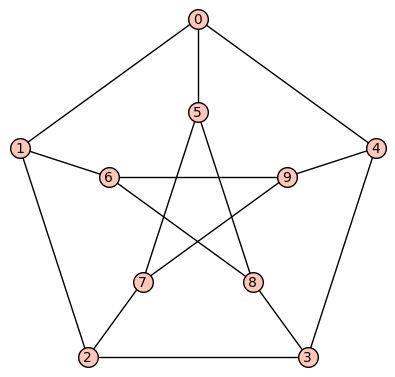

In [37]:
G.show()